In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sns.set_theme(style="darkgrid", palette="pastel")

In [2]:
data = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape


(8522, 12)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.duplicated().sum()


np.int64(0)

In [8]:
data.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

FILLING MISSING VALUES

In [9]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [10]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
data['Outlet_Size'].unique()


array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
data['Outlet_Size'].fillna('Medium', inplace=True)

C:\Users\fatimath hameema\AppData\Local\Temp\ipykernel_97100\474150044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Outlet_Size'].fillna('Medium', inplace=True)


In [13]:
data['Outlet_Type'].unique()


array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
# Replace zero visibility values with the mean visibility of the corresponding Item_Type
visibility_mean = data.groupby('Item_Type')['Item_Visibility'].mean()
data.loc[data['Item_Visibility'] == 0, 'Item_Visibility'] = data['Item_Type'].map(visibility_mean)

In [15]:
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x : x.mode()[0])


In [16]:
mode_of_outlet_size


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Medium,Medium,Medium,Medium


In [17]:
missing_value = data['Outlet_Size'].isnull()


In [18]:
missing_value.value_counts()


Outlet_Size
False    8522
Name: count, dtype: int64

In [19]:
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [20]:
data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,12.857370,0.070211,141.000471,1997.831964,2181.455027
std,4.226319,0.048756,62.274675,8.372247,1706.530835
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033084,93.844250,1987.000000,834.913200
50%,12.857370,0.061322,143.014100,1999.000000,1794.331000
75%,16.000000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


DATA ANALYSIS

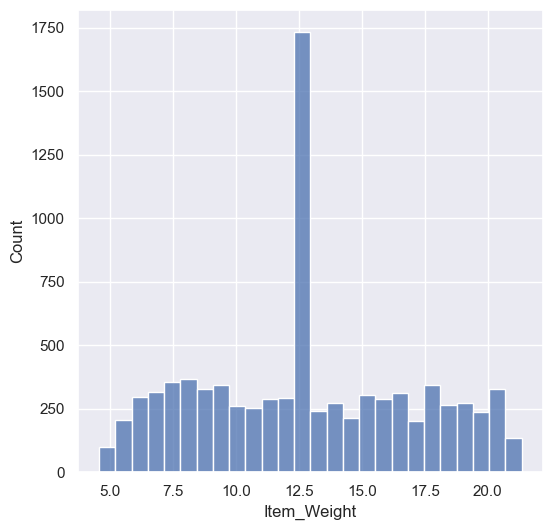

In [22]:
# Item_Weight Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Weight'])
plt.show()

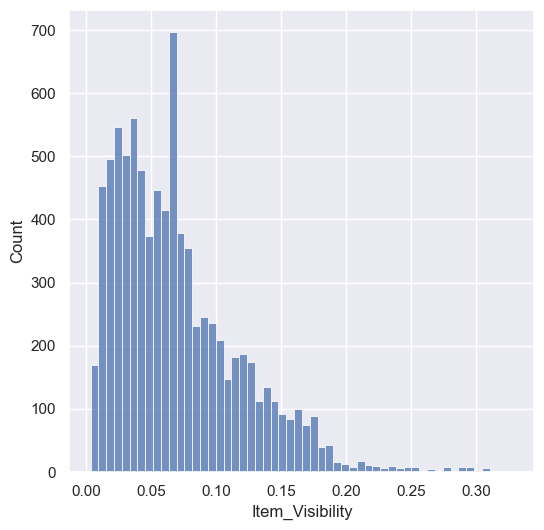

In [23]:
# Item_Visibility Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Visibility'])
plt.show()

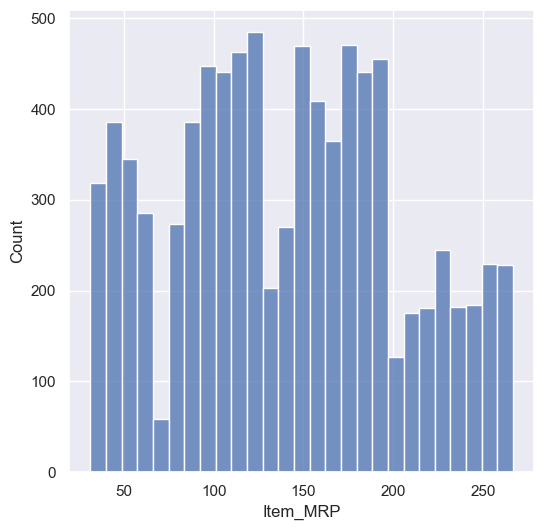

In [24]:
# Item_MRP Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['Item_MRP'])
plt.show()

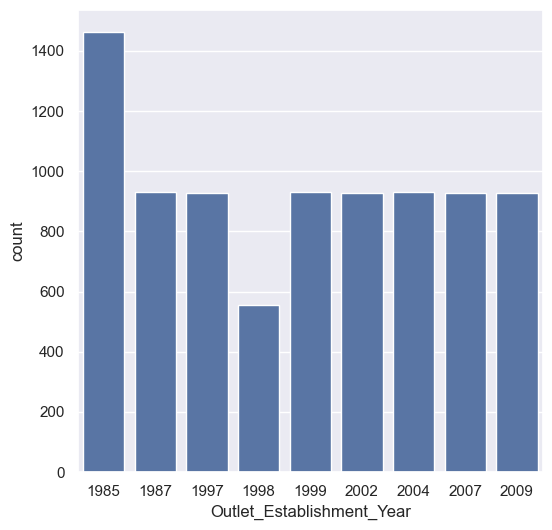

In [25]:
# Outlet_Establishment_Year Count

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()


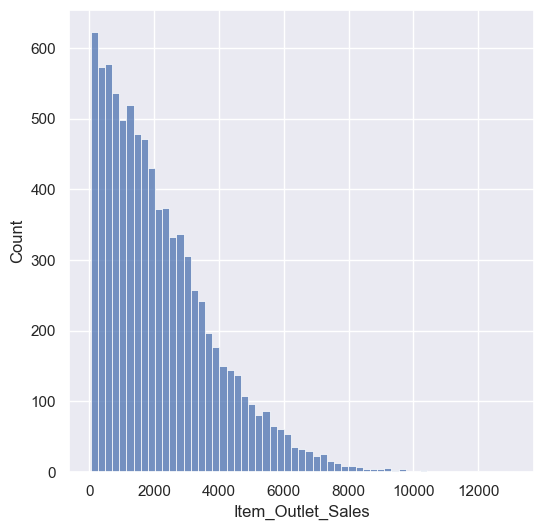

In [26]:
# Item_Outlet_Sales Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Outlet_Sales'])
plt.show()

In [27]:
data.select_dtypes(include='object').columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

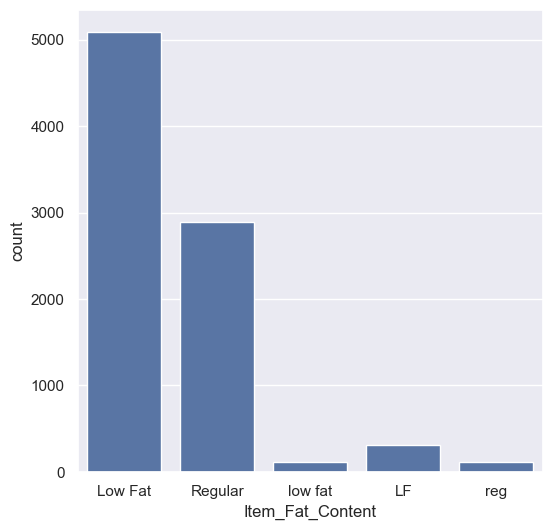

In [28]:
# Item_Fat_Content Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['Item_Fat_Content'])
plt.show()

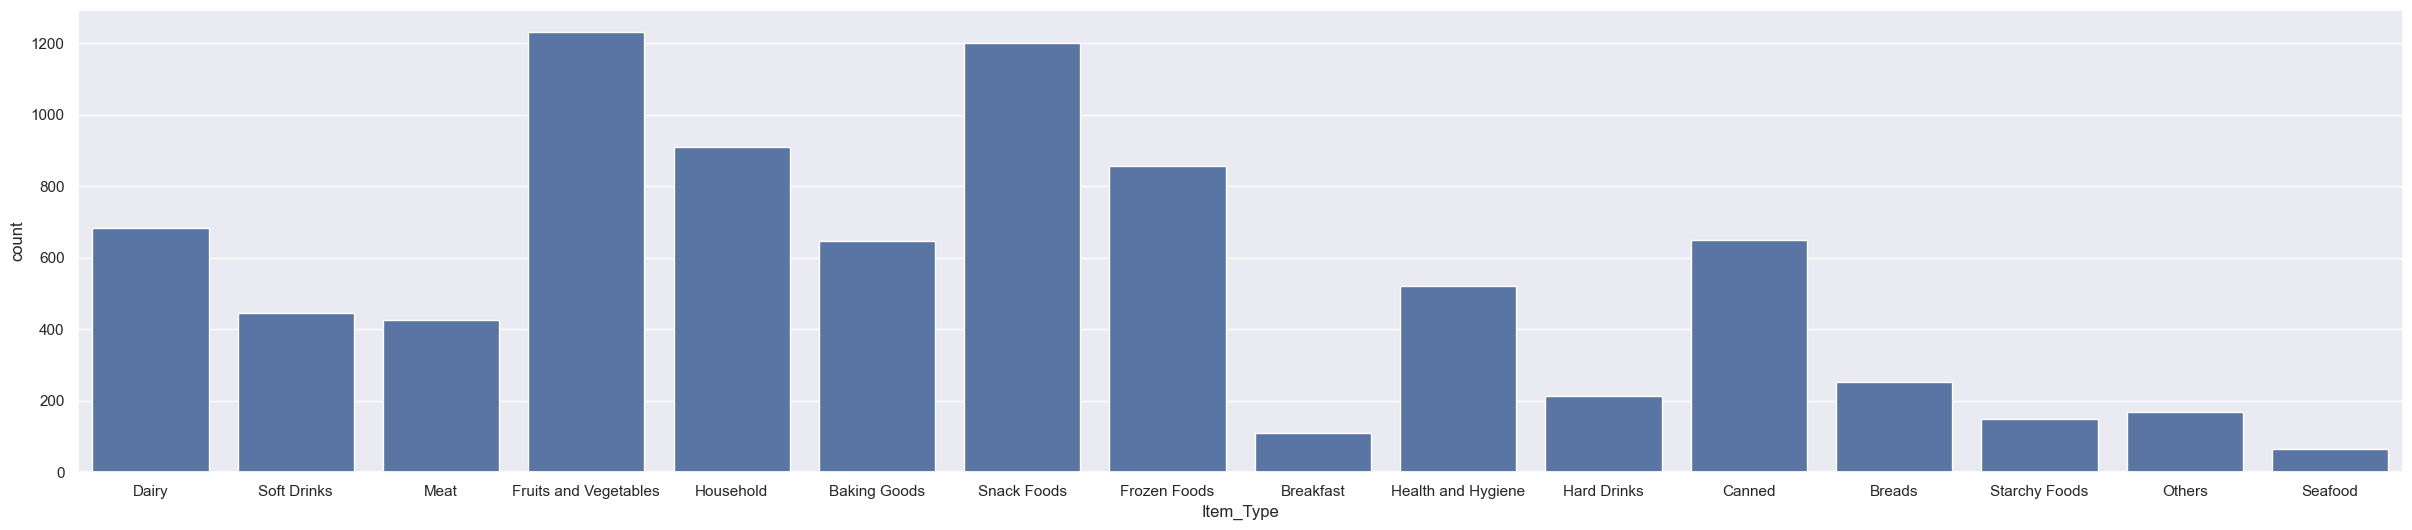

In [29]:
# Item_Type Count
sns.set()
plt.figure(figsize=(30,6))
sns.countplot(x=data['Item_Type'])
plt.show()

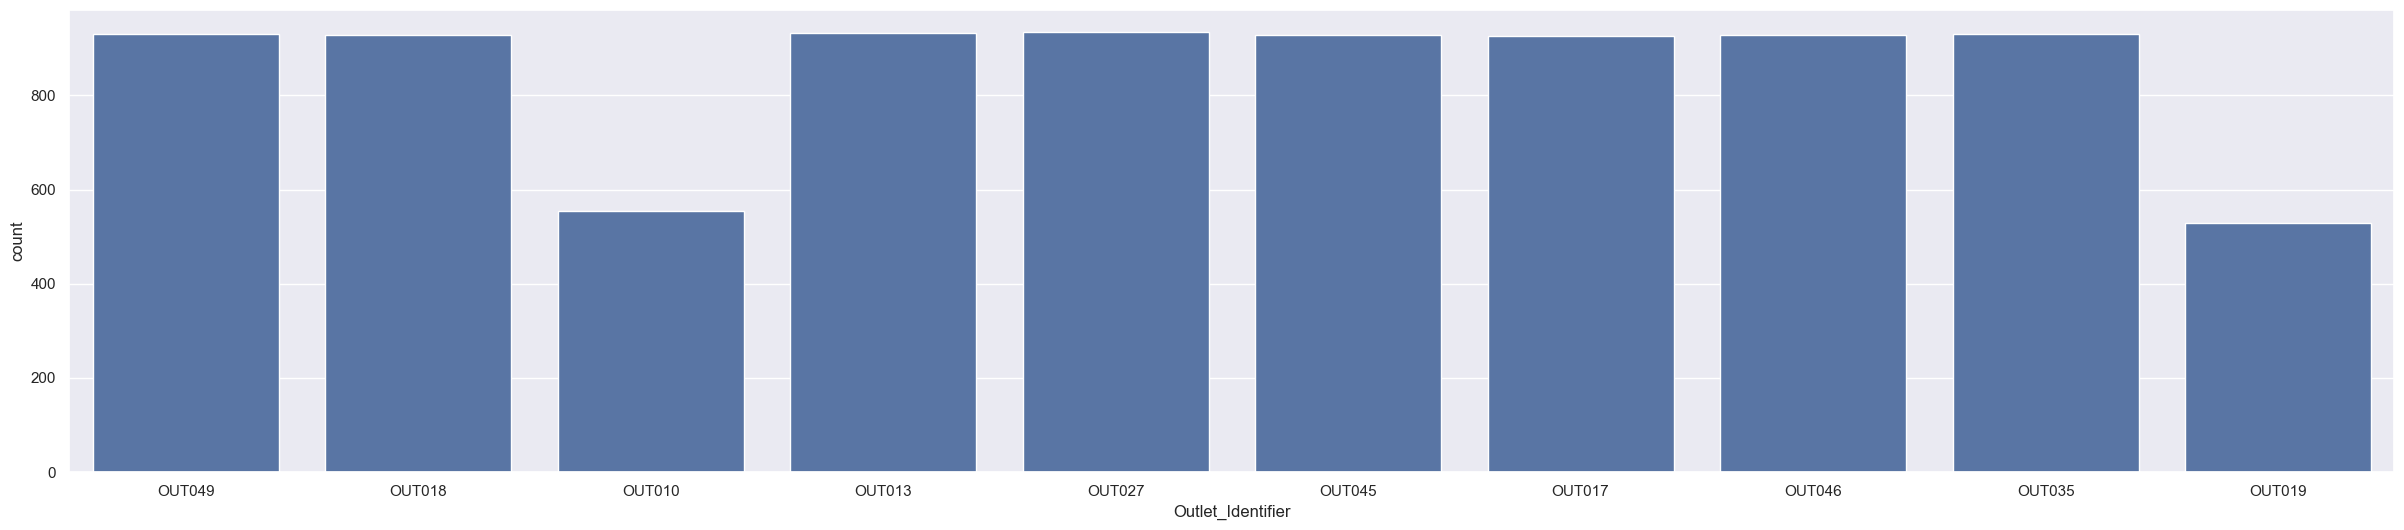

In [30]:
# Outlet_Identifier Count
sns.set()
plt.figure(figsize=(30,6))
sns.countplot(x=data['Outlet_Identifier'])
plt.show()

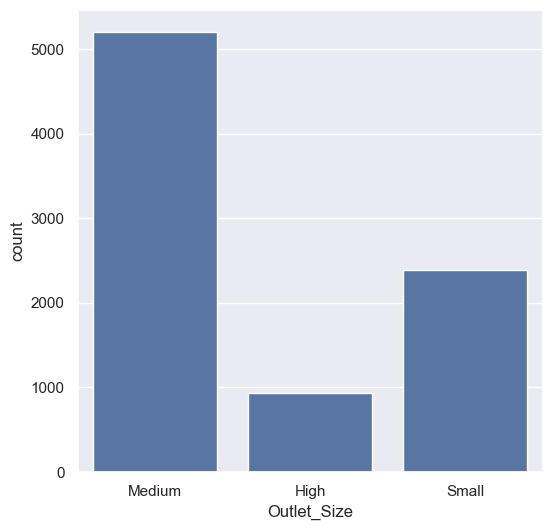

In [31]:
# Outlet_Size Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['Outlet_Size'])
plt.show()

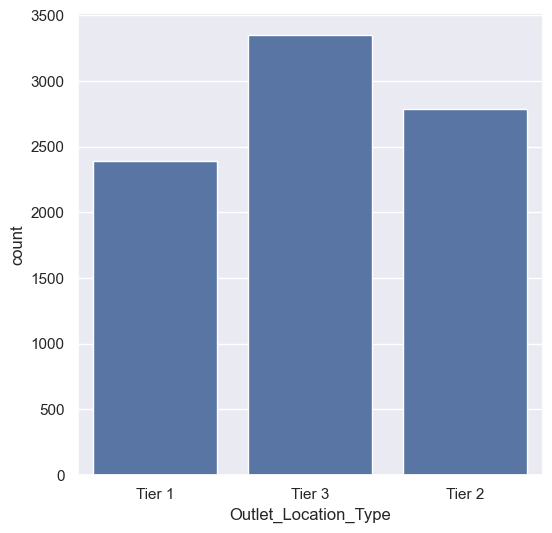

In [32]:
# Outlet_Location_Type Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['Outlet_Location_Type'])
plt.show()

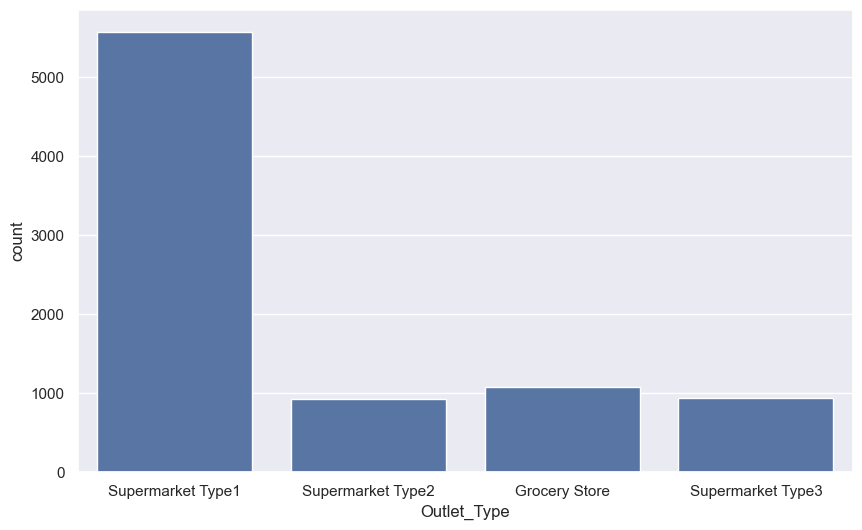

In [33]:
# Outlet_Type Count
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x=data['Outlet_Type'])
plt.show()

CATEGORICAL ENCODING / PREPROCESSING

In [34]:
data.drop('Item_Identifier', axis=1, inplace=True)

In [35]:
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)


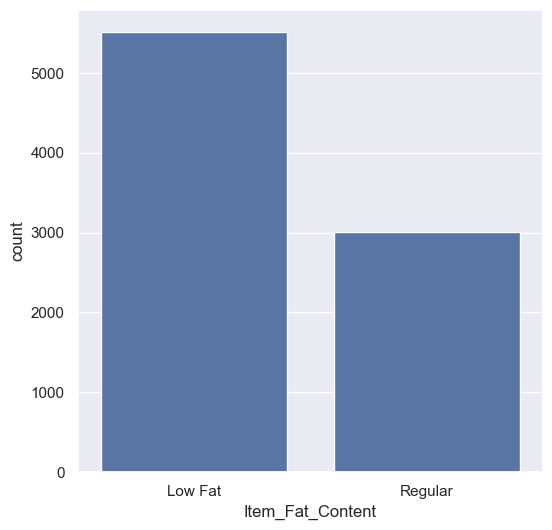

In [36]:
# Item_Fat_Content Count
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['Item_Fat_Content'])
plt.show()

In [37]:
data.select_dtypes(include='object').columns


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

LABEL ENCODER

In [38]:
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# One-Hot Encoding for categorical features
data = pd.get_dummies(data, columns=[
    'Item_Fat_Content', 'Item_Type', 
    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
])

In [40]:
data.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,OUT049,1999,3735.1380,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,OUT018,2009,443.4228,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,OUT049,1999,2097.2700,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.068513,182.0950,OUT010,1998,732.3800,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.061322,53.8614,OUT013,1987,994.7052,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


SPLITTING DATA

In [41]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(data.drop('Item_Outlet_Sales', axis=1), drop_first=True)
y = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Align columns to prevent missing categories issue
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [42]:
print(y_test.shape)

(1705,)


In [43]:
X.shape


(8522, 41)

In [44]:
y.shape


(8522,)

STANDARDIZATION

In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)


In [46]:
import joblib
joblib.dump(sc,'sc.sav')

['sc.sav']

RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 6]
}


# Run RandomizedSearchCV for best parameters
rf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
rf_cv.fit(X_train_std, y_train)

# Use the best estimator
rf_best = rf_cv.best_estimator_

# Predict with optimized model
rf_pred = rf_best.predict(X_test_std)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Optimized Random Forest RMSE: {rf_rmse:.2f}")


Optimized Random Forest RMSE: 1067.03


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

def evaluate_model(y_true, y_pred):
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAPE (%):", mean_absolute_percentage_error(y_true, y_pred) * 100)

# Example usage
evaluate_model(y_test, rf_pred)


MAE: 740.4346541453393
RMSE: 1067.0319752180817
R2 Score: 0.6062163816388944
MAPE (%): 55.386145757140795


DECISION TREES

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train_std, y_train)
dt_pred = dt.predict(X_test_std)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print(f"Decision Tree RMSE: {dt_rmse:.2f}")

dt.fit(X_train_std, y_train)


Decision Tree RMSE: 1113.08


DecisionTreeRegressor(max_depth=8, random_state=42)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAPE (%):", mean_absolute_percentage_error(y_true, y_pred) * 100)

evaluate_model(y_test, dt_pred)


MAE: 773.3613066517975
RMSE: 1113.0825884770443
R2 Score: 0.5714933599449719
MAPE (%): 57.15670731886835


HYBRID MODEL

In [67]:
# First stage: Random Forest predictions
rf.fit(X_train_std, y_train)
rf_train_pred = rf.predict(X_train_std)
residuals = y_train - rf_train_pred

# Second stage: Decision Tree on residuals
residual_model = DecisionTreeRegressor(max_depth=5, random_state=42)
residual_model.fit(X_train_std, residuals)

# Hybrid prediction
rf_test_pred = rf.predict(X_test_std)
residual_pred = residual_model.predict(X_test_std)
hybrid_pred = rf_test_pred + residual_pred

hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_pred))
print(f"Hybrid Model RMSE: {hybrid_rmse:.2f}")




Hybrid Model RMSE: 1119.31


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAPE (%):", mean_absolute_percentage_error(y_true, y_pred) * 100)

# Example for Random Forest
evaluate_model(y_test, hybrid_pred)


MAE: 781.762685696304
RMSE: 1119.308156245176
R2 Score: 0.5666866052880831
MAPE (%): 56.100609841627744


XGBOOST

In [69]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_std, y_train)
xgb_pred = xgb_model.predict(X_test_std)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE: {xgb_rmse:.2f}")

XGBoost RMSE: 1172.63


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAPE (%):", mean_absolute_percentage_error(y_true, y_pred) * 100)

# Example for Random Forest
evaluate_model(y_test, xgb_pred)

MAE: 820.4693742399727
RMSE: 1172.6285234123504
R2 Score: 0.524419887530094
MAPE (%): 60.49059035757249


In [71]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Hybrid Model', 'XGBoost'],
    'RMSE': [dt_rmse, rf_rmse, hybrid_rmse, xgb_rmse]
}).sort_values(by='RMSE')

print(results)

           Model         RMSE
1  Random Forest  1067.031975
0  Decision Tree  1113.082588
2   Hybrid Model  1119.308156
3        XGBoost  1172.628523


In [73]:
print("RF:", rf_pred[:5])
print("DT:", dt_pred[:5])
print("XGB:", xgb_pred[:5])
print("Hybrid:", hybrid_pred[:5])

RF: [ 214.96726982 1852.87921917 3054.36044256 4907.75851111 3065.69395698]
DT: [ 219.0482     1662.56852079 3109.33223611 5036.62568182 3109.33223611]
XGB: [  11.97621 1238.0847  3621.8372  5008.683   1625.6921 ]
Hybrid: [ 155.03669155 1337.67725755 3157.98777355 4917.84364955 2575.07321555]


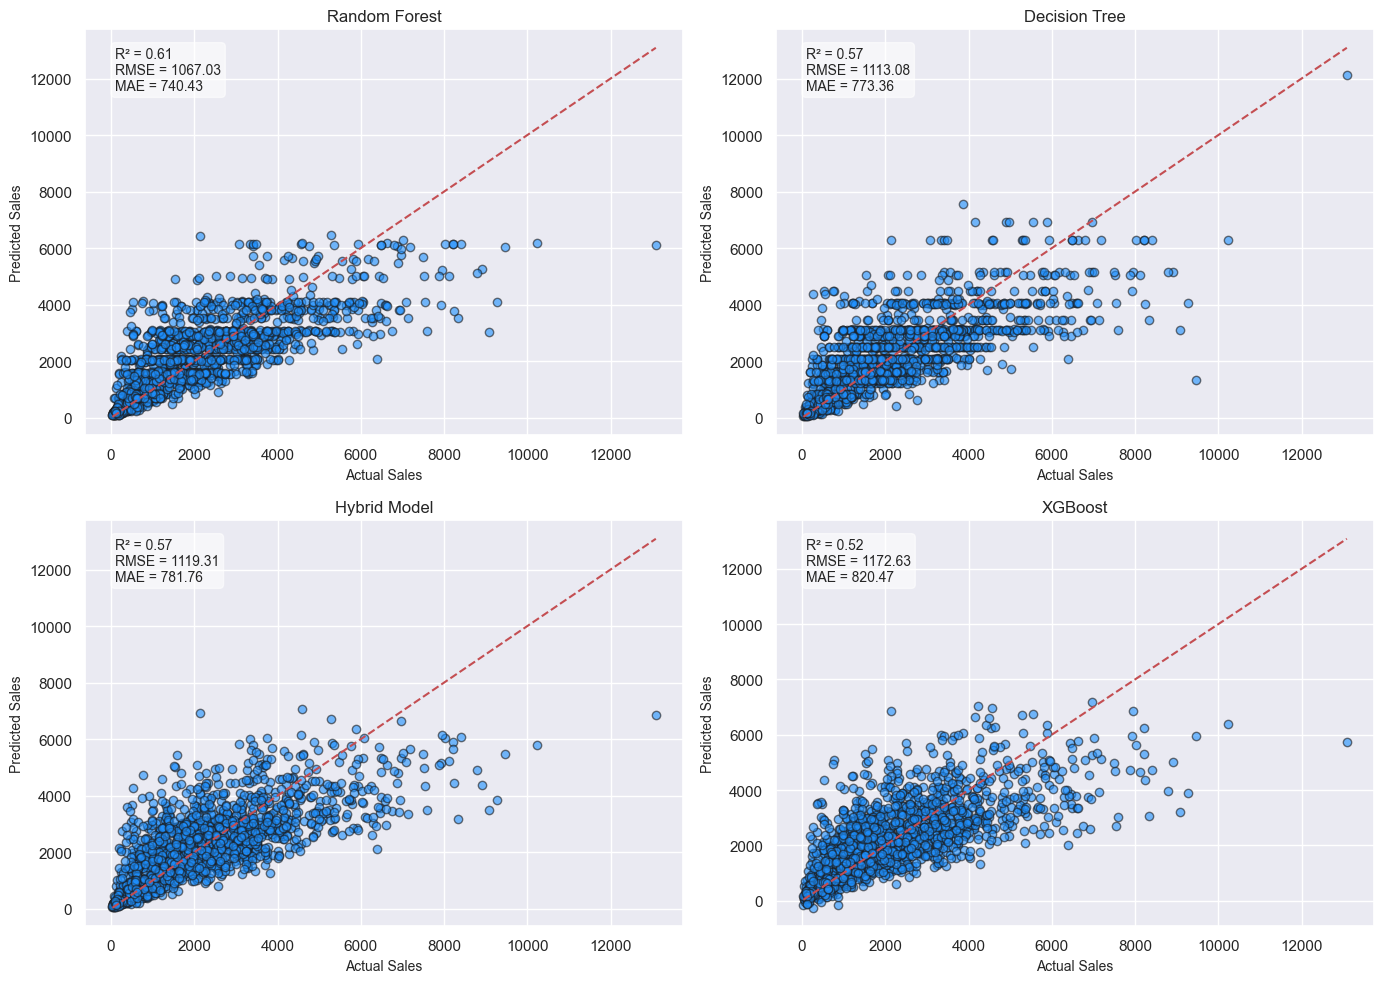

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_test is in array format
y_actual = y_test.values if hasattr(y_test, 'values') else y_test

models = {
    "Random Forest": rf_pred,
    "Decision Tree": dt_pred,
    "Hybrid Model": hybrid_pred,
    "XGBoost": xgb_pred
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

for i, (model_name, prediction) in enumerate(models.items()):
    # Scatter plot
    axs[i].scatter(y_actual, prediction, alpha=0.6, color='dodgerblue', edgecolors='k')
    axs[i].plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
    
    # Metrics
    r2 = r2_score(y_actual, prediction)
    rmse = np.sqrt(mean_squared_error(y_actual, prediction))
    mae = mean_absolute_error(y_actual, prediction)

    # Title and labels
    axs[i].set_title(f"{model_name}", fontsize=12)
    axs[i].set_xlabel("Actual Sales", fontsize=10)
    axs[i].set_ylabel("Predicted Sales", fontsize=10)
    
    # Metrics text
    metrics_text = f"R² = {r2:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}"
    axs[i].text(0.05, 0.85, metrics_text, transform=axs[i].transAxes,
                fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))
    
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [57]:
data.sample(4)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
6761,12.85737,0.055122,196.7768,OUT027,1985,5912.3040,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
5040,9.60000,0.036490,140.8154,OUT017,2007,1843.6002,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1546,14.50000,0.128459,102.0332,OUT049,1999,2050.6640,False,True,True,False,...,False,True,False,True,False,False,False,True,False,False
6231,10.19500,0.147493,141.5838,OUT017,2007,1685.8056,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [58]:
import pickle
import joblib  # Alternative method

# OR using joblib
joblib.dump(rf_best, 'model.pkl')

['model.pkl']

In [59]:
# Assuming rf_best is your trained model
pickle.dump(rf_best, open('model.pkl', 'wb'))

In [60]:
print("Received Data:", data)
print("Shape:", np.array(data).shape)


Received Data:       Item_Weight  Item_Visibility  Item_MRP Outlet_Identifier  \
0           9.300         0.016047  249.8092            OUT049   
1           5.920         0.019278   48.2692            OUT018   
2          17.500         0.016760  141.6180            OUT049   
3          19.200         0.068513  182.0950            OUT010   
4           8.930         0.061322   53.8614            OUT013   
...           ...              ...       ...               ...   
8517       20.750         0.083607  178.8318            OUT046   
8518        6.865         0.056783  214.5218            OUT013   
8519        8.380         0.046982  108.1570            OUT045   
8520       10.600         0.035186   85.1224            OUT035   
8521        7.210         0.145221  103.1332            OUT018   

      Outlet_Establishment_Year  Item_Outlet_Sales  Item_Fat_Content_Low Fat  \
0                          1999          3735.1380                      True   
1                          2009 

In [61]:
feature_names = X_train.columns.tolist()

# Save feature names
pickle.dump(feature_names, open('feature_names.pkl', 'wb'))

In [63]:
import pickle

# Load feature names
feature_names = pickle.load(open("feature_names.pkl", "rb"))

# Print them out
print("Feature Names Used in Training:", feature_names)


Feature Names Used in Training: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',

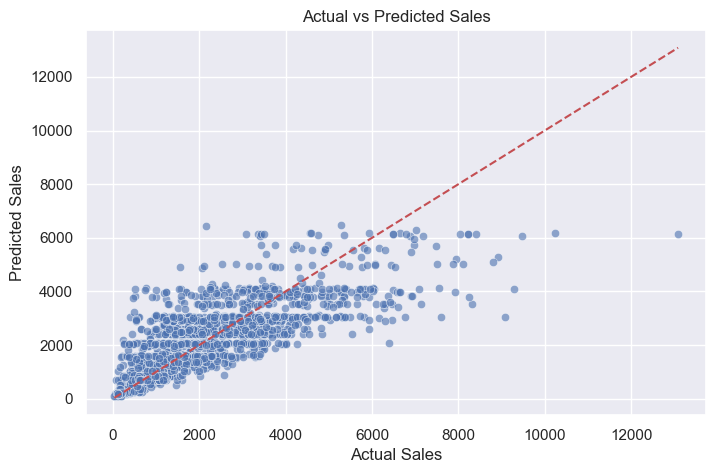

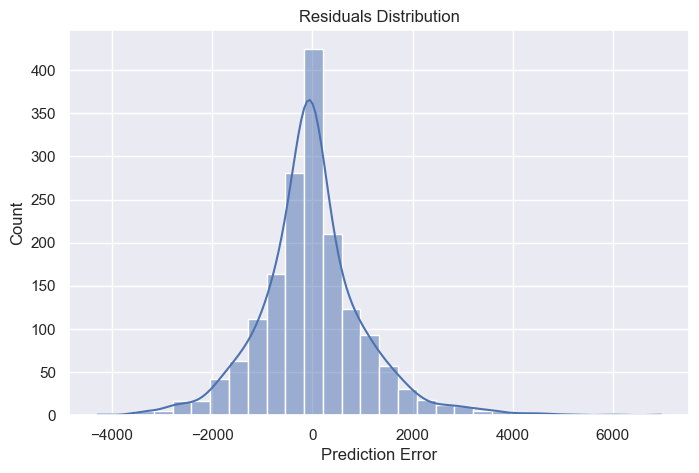

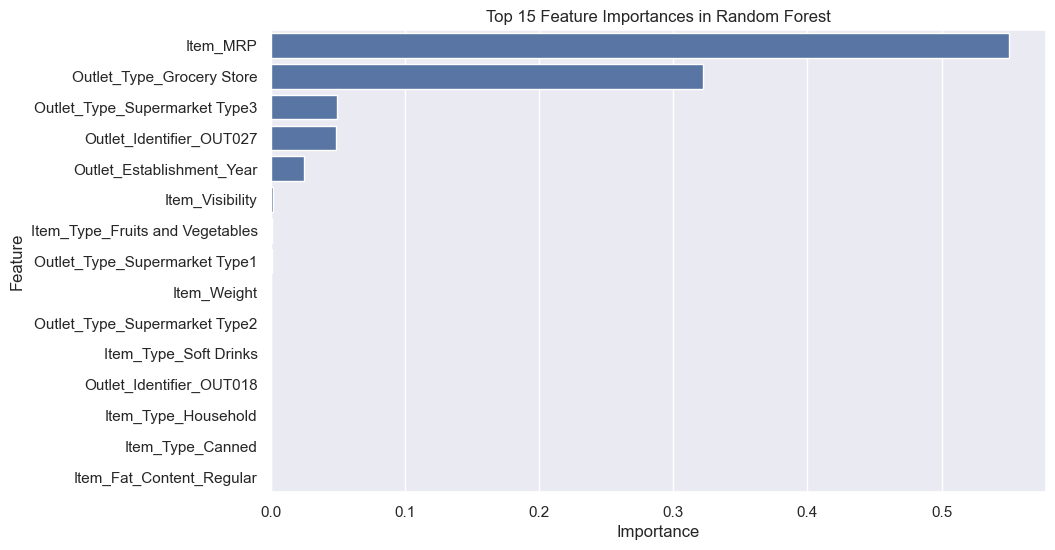

Test RMSE: 1067.03
R² Score: 0.61


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = rf_best.predict(X_test_std)

# Residuals
residuals = y_test - rf_pred

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.show()

# Feature Importance
import pandas as pd
feat_importance = rf_best.feature_importances_
features = X_train.columns if hasattr(X_train, "columns") else [f'Feature {i}' for i in range(len(feat_importance))]
importance_df = pd.DataFrame({'Feature': features, 'Importance': feat_importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 Feature Importances in Random Forest")
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Predictions shape:", rf_pred.shape)


X_test shape: (1705, 41)
y_test shape: (1705,)
Predictions shape: (1705,)


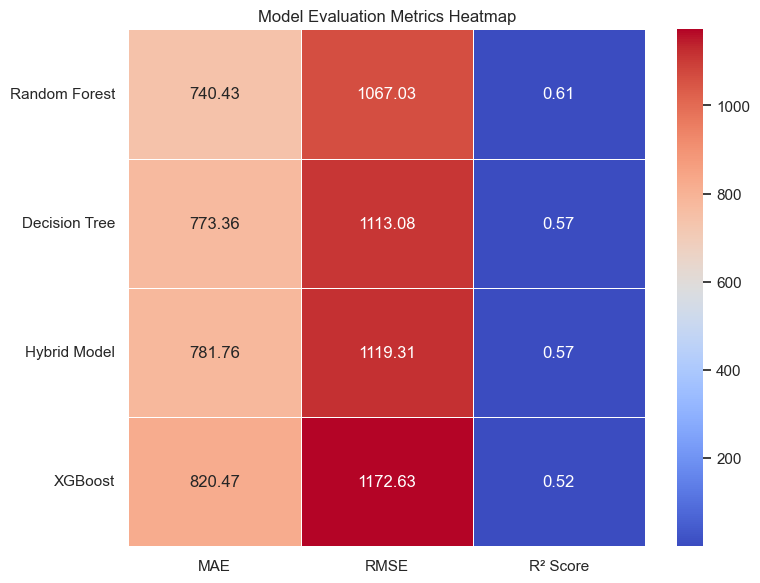

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data (same as before)
metrics_data = []

for name, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    metrics_data.append([mae, rmse, r2])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data, index=models.keys(), columns=["MAE", "RMSE", "R² Score"])

# Round values for cleaner display
metrics_df = metrics_df.round(2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Model Evaluation Metrics Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

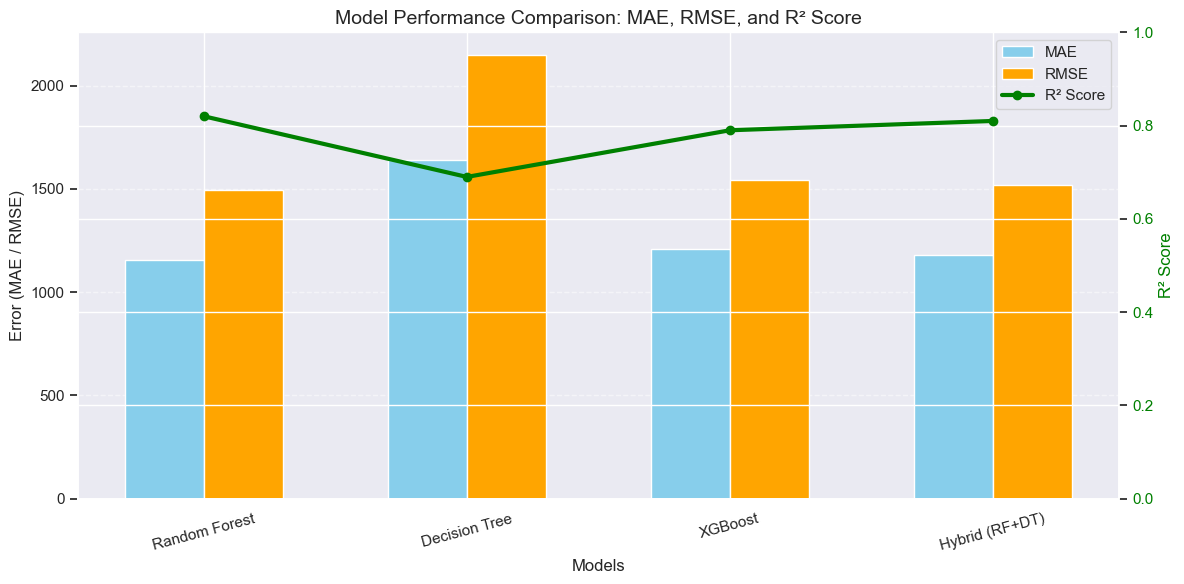

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Decision Tree', 'XGBoost', 'Hybrid (RF+DT)']

# Metrics
mae_scores = [1154.32, 1638.57, 1210.45, 1179.89]
rmse_scores = [1492.65, 2150.72, 1543.76, 1518.34]
r2_scores = [0.82, 0.69, 0.79, 0.81]

x = np.arange(len(models))
width = 0.3

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for MAE and RMSE
bar1 = ax1.bar(x - width/2, mae_scores, width, label='MAE', color='skyblue')
bar2 = ax1.bar(x + width/2, rmse_scores, width, label='RMSE', color='orange')

# Label and grid for MAE/RMSE axis
ax1.set_ylabel('Error (MAE / RMSE)', fontsize=12)
ax1.set_xlabel('Models', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=15)
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Second Y-axis for R²
ax2 = ax1.twinx()
line = ax2.plot(x, r2_scores, label='R² Score', color='green', marker='o', linewidth=3)

# Label for R² axis
ax2.set_ylabel('R² Score', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1)

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Model Performance Comparison: MAE, RMSE, and R² Score', fontsize=14)
plt.tight_layout()
plt.show()
